<center>
BDP Project <Br> Fruit Recognitization using PySpark <br> <Br>
<b>Kushal Barot  (202318006) <br> Harshil Shah (202318033) <br> Hani Soni (202318044)
</ center>

# Dataset loading

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=dfe9cc00dd0d022dba984f9b2d99696797d9176117091fbee2bd7e4ba3b0082c
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
import requests

# Direct link to the Fruit-Images-Dataset zip file
url = 'https://github.com/Horea94/Fruit-Images-Dataset/archive/refs/heads/master.zip'

# Send a GET request to download the zip file
response = requests.get(url)

# Save the downloaded zip file
with open('dataset.zip', 'wb') as f:
    f.write(response.content)


In [ ]:
import zipfile

# Unzip the dataset.zip file
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Now you can list the files in the extracted directory
import os

extracted_dir = 'dataset/Fruit-Images-Dataset-master'
for file in os.listdir(extracted_dir):
    print(file)


test-multiple_fruits
src
papers
Test
readme.md
LICENSE
Training


In [ ]:
import os
import pandas as pd

# Define the paths to the training and test directories
train_dir = 'dataset/Fruit-Images-Dataset-master/Training/'
test_dir = 'dataset/Fruit-Images-Dataset-master/Test/'

# Function to load images and create DataFrame
def load_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                images.append(os.path.join(label_dir, image_file))
                labels.append(label)
    return pd.DataFrame({'image_path': images, 'label': labels})

# Load images from training and test directories
train_data = load_images(train_dir)
test_data = load_images(test_dir)

# Display first 5 rows of training data
print("Training Data:")
print(train_data.head())

# Display first 5 rows of test data
print("\nTest Data:")
print(test_data.head())


Training Data:
                                          image_path     label
0  dataset/Fruit-Images-Dataset-master/Training/B...  Beetroot
1  dataset/Fruit-Images-Dataset-master/Training/B...  Beetroot
2  dataset/Fruit-Images-Dataset-master/Training/B...  Beetroot
3  dataset/Fruit-Images-Dataset-master/Training/B...  Beetroot
4  dataset/Fruit-Images-Dataset-master/Training/B...  Beetroot

Test Data:
                                          image_path     label
0  dataset/Fruit-Images-Dataset-master/Test/Beetr...  Beetroot
1  dataset/Fruit-Images-Dataset-master/Test/Beetr...  Beetroot
2  dataset/Fruit-Images-Dataset-master/Test/Beetr...  Beetroot
3  dataset/Fruit-Images-Dataset-master/Test/Beetr...  Beetroot
4  dataset/Fruit-Images-Dataset-master/Test/Beetr...  Beetroot


In [ ]:

# def load_img(image_path):
#     return Image.open(image_path)
# # Load and display the image
# img = load_img(train_dir + "Cantaloupe 1/r_234_100.jpg")
# plt.imshow(img)
# plt.axis("off")
# plt.show()


🍉Let's look at the shape of the pictures we have.

🍐 this is important to us because this will be the input value of our model.

In [ ]:
# from keras.preprocessing.image import img_to_array

# # Assuming 'img' is the image loaded using PIL
# array_image = img_to_array(img)

# # Print the shape of the array image
# print("Image Shape --> ", array_image.shape)


In [ ]:

# from glob import glob

# fruit_dirs = glob(train_dir + '/*')
# number_of_classes = len(fruit_dirs)

# print("How many different fruits are there  -->  ", number_of_classes)

# PySpark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import StringType

# Initialize SparkSession
# spark = SparkSession.builder \
#     .appName("Load_Fruit_Images") \
#     .getOrCreate()

spark = SparkSession.builder \
    .appName("Load_Fruit_Images") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()


In [ ]:
# Define the paths to the training and test directories
train_dir = 'dataset/Fruit-Images-Dataset-master/Training/'
test_dir = 'dataset/Fruit-Images-Dataset-master/Test/'


In [ ]:

# Function to load images and create DataFrame
def load_images(directory):
    # Create a DataFrame with image paths and labels
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image_file)
                images.append(image_path)
                labels.append(label)
    return spark.createDataFrame(zip(images, labels), schema=["image_path", "label"])

In [ ]:
import os
# Load images from training and test directories
train_data = load_images(train_dir)
test_data = load_images(test_dir)

# Display first 5 rows of training data
print("Training Data:")
train_data.show(5)

# Display first 5 rows of test data
print("\nTest Data:")
test_data.show(5)


Training Data:
+--------------------+--------+
|          image_path|   label|
+--------------------+--------+
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
+--------------------+--------+
only showing top 5 rows


Test Data:
+--------------------+--------+
|          image_path|   label|
+--------------------+--------+
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
+--------------------+--------+
only showing top 5 rows



In [ ]:
from operator import add

labels_rdd = train_data.select("label").rdd.map(lambda row: (row["label"], 1))

# Count the occurrences of each label
label_counts = labels_rdd.reduceByKey(add)

# Get the 15 most frequently found fruits
most_fruits = label_counts.takeOrdered(15, key=lambda x: -x[1])

# Print the 15 most frequently found fruits and their counts
print("The 15 most frequently found fruits in the dataset and their number:")
for fruit, count in most_fruits:
    print(fruit, "-->", count)

The 15 most frequently found fruits in the dataset and their number:
Grape Blue --> 984
Plum 3 --> 900
Melon Piel de Sapo --> 738
Cherry 2 --> 738
Tomato 3 --> 738
Strawberry Wedge --> 738
Cherry Rainier --> 738
Tomato 1 --> 738
Peach 2 --> 738
Walnut --> 735
Pear Stone --> 711
Pear Forelle --> 702
Fig --> 702
Pepper Orange --> 702
Cauliflower --> 702


In [ ]:
import plotly.graph_objects as go

# Extract fruit labels and counts from most_fruits
x = [fruit for fruit, count in most_fruits]
counts = [count for fruit, count in most_fruits]

# Create a bar plot
fig = go.Figure([go.Bar(x=x, y=counts)])

# Update layout
fig.update_layout(title="The 15 most frequently found fruits in the dataset",
                  xaxis_title="Fruit",
                  yaxis_title="Count")

# Show the plot
fig.show()

In [ ]:
# plt.figure(figsize=(25,16))
# how_many_fruits = len(x)

# for i in range(how_many_fruits):
#     fruits = train_dir[train_dir["Fruits"] == x[i]]["Fruits Image"].values [1]

#     plt.subplot(3,5,i+1)
#     img = load_img(train_dir + fruits)
#     plt.imshow(img)
#     plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
#     plt.axis("off")

# plt.suptitle("The 15 Most Abundant Fruits", fontsize = 25 , color = "darkred", fontweight = 'bold')
# plt.show()

In [ ]:
how_many_fruits=len(most_fruits)

#Feature Extraction using VGG-16

In [ ]:
train_data.show(5)

+--------------------+--------+
|          image_path|   label|
+--------------------+--------+
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
|dataset/Fruit-Ima...|Beetroot|
+--------------------+--------+
only showing top 5 rows



In [ ]:
!pip install keras


In [ ]:
!pip install tensorflow


In [ ]:
from keras.applications import VGG16
from keras.layers import Flatten, Dense
from keras.models import Model


In [ ]:
# load model without classifier layers
model_extr = VGG16(include_top = False, input_shape = (100, 100, 3))
# add new classifier layers
flat1 = Flatten()(model_extr.layers[-1].output)
output = Dense(500, activation ='relu')(flat1)
# define new model1
model_cnn = Model(inputs = model_extr.inputs, outputs = output)
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
distinct_labels = train_data.select("label").distinct().collect()


# Get distinct labels as a list
distinct_labels_list = [row["label"] for row in distinct_labels]

# Print distinct labels list
print("Distinct labels as list:", distinct_labels_list)


Distinct labels as list: ['Papaya', 'Tomato 2', 'Pepino', 'Grape White', 'Pineapple', 'Banana Red', 'Pitahaya Red', 'Clementine', 'Pear Forelle', 'Avocado ripe', 'Huckleberry', 'Cantaloupe 1', 'Orange', 'Peach', 'Quince', 'Plum', 'Cherry Rainier', 'Walnut', 'Grapefruit White', 'Potato Red', 'Nut Pecan', 'Onion White', 'Mandarine', 'Pepper Yellow', 'Strawberry Wedge', 'Beetroot', 'Cherry Wax Black', 'Tomato 3', 'Grapefruit Pink', 'Cactus fruit', 'Tamarillo', 'Grape White 4', 'Potato White', 'Pear', 'Pepper Red', 'Apple Red 2', 'Passion Fruit', 'Grape White 2', 'Lemon', 'Salak', 'Dates', 'Apple Pink Lady', 'Maracuja', 'Mango Red', 'Avocado', 'Apple Granny Smith', 'Cantaloupe 2', 'Grape White 3', 'Tangelo', 'Watermelon', 'Nectarine', 'Eggplant', 'Pear Kaiser', 'Pepper Green', 'Pear Abate', 'Redcurrant', 'Apricot', 'Mangostan', 'Blueberry', 'Corn', 'Tomato Heart', 'Cherry Wax Yellow', 'Plum 2', 'Lemon Meyer', 'Mulberry', 'Physalis with Husk', 'Pear 2', 'Potato Sweet', 'Cucumber Ripe 2', 'K

In [ ]:
len(distinct_labels_list)

131

In [ ]:
def parse_categorie(path):
    if len(path) > 0:
        return path.split('/')[-2].replace('%20', ' ')
    else:
        return ''

In [ ]:
def load_data(path):
    # start = time.time()
    df_img = spark.read.format("Image").load(path)
    df_img = df_img.withColumn("Path", input_file_name())

    udf_categorie = udf(parse_categorie, StringType())
    df_img = df_img.withColumn('Category', udf_categorie('Path'))
#     print('Loading time : {} secondes'.format(time.strftime('%S', time.gmtime(time.time()-start))))

    return df_img

In [ ]:
# distinct_labels = [row['label'] for row in distinct_labels.collect()]
from pyspark.sql.functions import input_file_name, udf
from pyspark.sql.types import StringType
import time

path = 'dataset/Fruit-Images-Dataset-master/Training/'

for fruit in distinct_labels_list:
    path_fruit = path + "{}".format(fruit)
    fruit_df = load_data(path = path_fruit)
    if fruit == distinct_labels_list[0]:
        image_df = fruit_df
    else:
        image_df = image_df.union(fruit_df)

    del fruit_df

image_df.show()
nb = image_df.count()
print('DF count {} elements.'.format(nb))


+--------------------+--------------------+--------+
|               image|                Path|Category|
+--------------------+--------------------+--------+
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  Papaya|
|{file:///content/...|file:///content/d...|  P

In [ ]:
image_df.show(5)

In [ ]:
from time import time

# Record the start time
start_time = time()

from keras.applications.vgg16 import preprocess_input
import numpy as np
nb = 1000

# Limit the number of rows in the Spark DataFrame
limited_df = image_df.limit(nb)

# Convert the limited Spark DataFrame to a pandas DataFrame
pandas_df = limited_df.toPandas()

# Initialize list to store VGG16 predictions
VGG16_pred = []

# Iterate over the DataFrame directly
for _, row in pandas_df.iterrows():
    image_data = np.array(row['image']['data']).reshape(100, 100, 3)[:, :, ::-1]
    img = image_data.reshape((1, image_data.shape[0], image_data.shape[1], image_data.shape[2]))
    img_ready = preprocess_input(img)
    pred = model_cnn.predict(img_ready)
    VGG16_pred.append(pred)

# Convert predictions list to numpy array and reshape it
feat_VGG16 = np.asarray(VGG16_pred)
feat_VGG16.shape = (len(pandas_df), 500)

# Calculate processing time
duration = time() - start_time
print("Processing time for VGG16 descriptor:", "%15.2f" % duration, "seconds")



1/1 [==============================] - 0s 458ms/step
Processing time for VGG16 descriptor:          275.65 seconds


In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.ml.linalg import Vectors


list_feat = feat_VGG16.tolist()
data = [Vectors.dense(l) for l in list_feat]

a = image_df.withColumn("row_idx", row_number().over(Window.orderBy(monotonically_increasing_id())))
b = spark.createDataFrame([(l,) for l in data], ['Features'])
b = b.withColumn("row_idx", row_number().over(Window.orderBy(monotonically_increasing_id())))

image_feat = a.join(b, a.row_idx == b.row_idx).drop("row_idx")
image_feat = image_feat.drop('image')
image_feat.show()


+--------------------+--------+--------------------+
|                Path|Category|            Features|
+--------------------+--------+--------------------+
|file:///content/d...|  Papaya|[14.6802253723144...|
|file:///content/d...|  Papaya|[15.4270191192626...|
|file:///content/d...|  Papaya|[15.3555879592895...|
|file:///content/d...|  Papaya|[20.4839382171630...|
|file:///content/d...|  Papaya|[14.1352710723876...|
|file:///content/d...|  Papaya|[16.2197895050048...|
|file:///content/d...|  Papaya|[14.1494474411010...|
|file:///content/d...|  Papaya|[16.5946693420410...|
|file:///content/d...|  Papaya|[17.7567825317382...|
|file:///content/d...|  Papaya|[17.9750843048095...|
|file:///content/d...|  Papaya|[17.6342372894287...|
|file:///content/d...|  Papaya|[16.0989074707031...|
|file:///content/d...|  Papaya|[15.9298276901245...|
|file:///content/d...|  Papaya|[15.1242980957031...|
|file:///content/d...|  Papaya|[18.3900909423828...|
|file:///content/d...|  Papaya|[15.25185585021

In [ ]:
from pyspark.sql.functions import split

# Drop the 'path' column
image_feat = image_feat.drop('Path')

# # Display the resulting DataFrame
# image_feat.show()


In [ ]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = image_feat.toPandas()



In [ ]:
# Convert the array in column2 into separate columns
expanded_df = pandas_df['Features'].apply(pd.Series)

# Combine the expanded columns with the original DataFrame
result_df = pd.concat([pandas_df['Category'], expanded_df], axis=1)

print(result_df)

     Category          0          1          2          3          4  \
0      Papaya  14.680225   8.001408   5.701675   3.686701   0.000000   
1      Papaya  15.427019  10.805851   4.440190   1.617608   0.000000   
2      Papaya  15.355588   9.925527   5.866589   0.717192   0.000000   
3      Papaya  20.483938  10.145339   7.622458   0.507789   0.000000   
4      Papaya  14.135271   6.553150   7.409959   4.427319   0.000000   
..        ...        ...        ...        ...        ...        ...   
995  Tomato 2   0.000000   0.181445  20.378578  14.258394  13.271781   
996  Tomato 2   0.000000   0.000000  18.748688  14.074215  13.908970   
997  Tomato 2   7.712269  10.176566  25.905508  12.780256   4.665007   
998  Tomato 2   7.903107   5.592746  24.431599   9.756427   9.185334   
999  Tomato 2  13.457470  11.962349  29.729834  15.862899   6.615726   

             5          6    7    8  ...       490        491       492  \
0    14.323513   1.091032  0.0  0.0  ...  3.717184  15.09406

#PCA

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA


In [ ]:
# Standardize the features
scaler = StandardScaler(
    inputCol = 'Features',
    outputCol = 'scaledFeatures',
    withMean = True,
    withStd = True
)

model_sc = scaler.fit(image_feat)
image_feat_sc = model_sc.transform(image_feat)
image_feat_sc.show(20)

In [ ]:
pca = PCA(k = 4,
          inputCol = "scaledFeatures",
          outputCol = "pca_features")
# Fit & transform the model on the extracted features
model_pca = pca.fit(image_feat_sc)
image_feat_pca = model_pca.transform(image_feat_sc)
print('Explained Variance Ratio', model_pca.explainedVariance.toArray())
image_feat_pca.show(20)

In [ ]:
columns_to_drop = ['Path', 'Features', 'scaledFeatures']
df_final = image_feat_pca.drop(*columns_to_drop)


In [ ]:
df_final

In [ ]:
df_final.show(5)

In [ ]:
df_pandas = df_final.toPandas()

# Display the first 5 rows of the pandas DataFrame
print(df_pandas.head())

In [ ]:
df_pandas.head()

In [ ]:
df_pandas.columns

In [ ]:
pd.DataFrame(df_pandas['pca_features'].tolist())

In [ ]:
df_pandas[['pca_feature_1', 'pca_feature_2', 'pca_feature_3','pca_feature_4']] = pd.DataFrame(df_pandas['pca_features'].tolist(), index=df_pandas.index)

# Dropping the original 'pca_feature' column if needed
df_pandas.drop(columns=['pca_features'], inplace=True)

# Displaying the resulting DataFrame
print(df_pandas)

In [ ]:
from pyspark.sql.functions import col

# Rename the "category" column to "label"
df_final = df_final.withColumnRenamed("Category", "label")

# Separate the feature and label columns
features = df_final.select("pca_features")
labels = df_final.select("label")


In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=18

model.summary()

#Model fitting

In [ ]:
# Extract the 'Category' column as y
y = result_df['Category']

# Extract all columns after the 'Category' column as X
X = result_df.iloc[:, 1:]  # Assuming 'Category' column is the first column

# Print the shape of X
print("Shape of X:", X.shape)


Shape of X: (1000, 500)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
x_train_features = x_train.values  # Convert DataFrame to numpy array
x_test_features = x_test.values    # Convert DataFrame to numpy array

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model = Sequential()

# Input layer for feature vectors
model.add(Dense(64, activation='relu', input_shape=(500,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

# Now you can use the encoded labels for training
history = model.fit(x_train_features, y_train_encoded,
                    steps_per_epoch=50,
                    epochs=30,
                    validation_data=(x_test_features, y_test_encoded),
                    validation_steps=200)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                32064     
                                                                 
 batch_normalization_39 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_40 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_40 (Dropout)        (None, 128)             

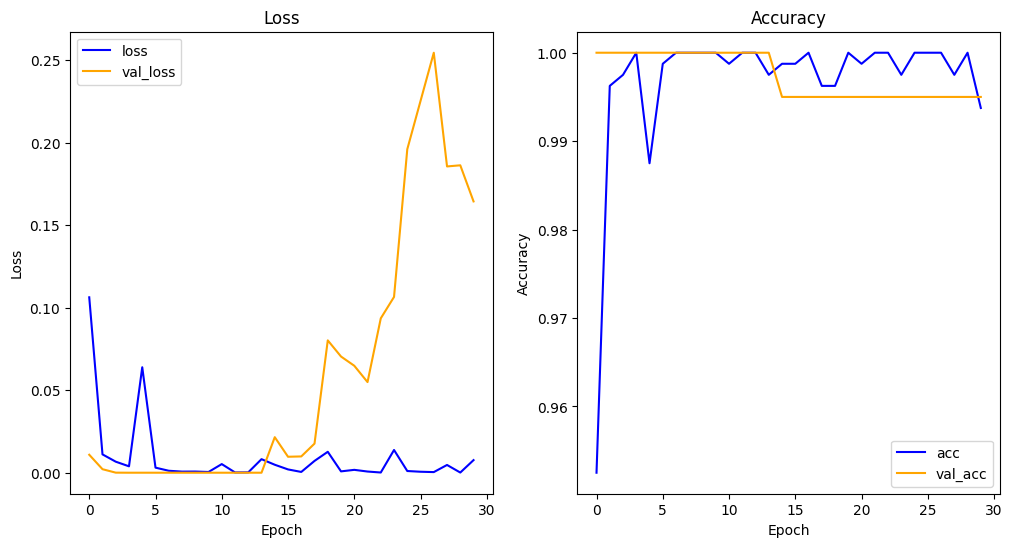

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss', color="blue")
plt.plot(history.history['val_loss'], label='val_loss', color="orange")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy per iteration

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='acc', color="blue")
plt.plot(history.history['val_accuracy'], label='val_acc', color="orange")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()